In [1]:
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error


In [2]:
current_dir = os.getcwd() 
relative_path = os.path.join('..','..', 'data', 'x_train.csv')
x_train=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train.csv')
y_train=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_val.csv')
x_val=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_val.csv')
y_val=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_test.csv')
x_test=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_test.csv')
y_test=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_smote.csv')
x_train_smote=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_smote.csv')
y_train_smote=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_ros.csv')
x_train_ros=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_ros.csv')
y_train_ros=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_rur.csv')
x_train_rur=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_rur.csv')
y_train_rur=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_smotetomek.csv')
x_train_smotetomek=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_smotetomek.csv')
y_train_smotetomek=pd.read_csv(os.path.join(current_dir, relative_path))




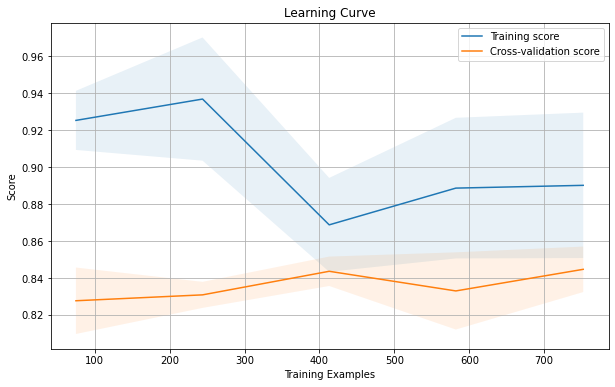

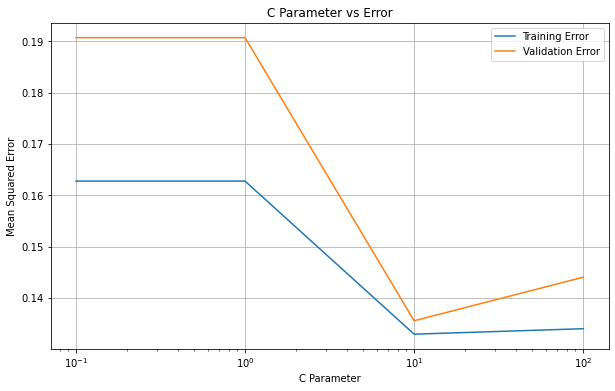

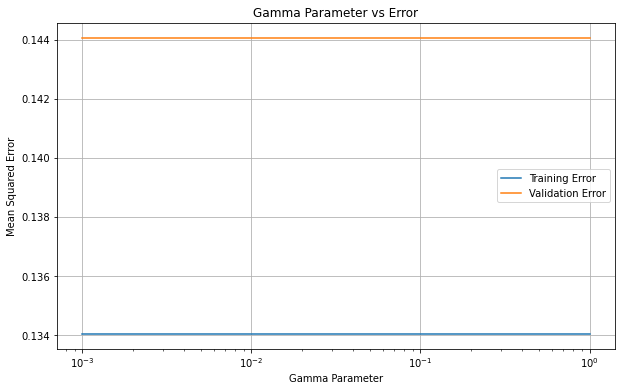

In [3]:
warnings.filterwarnings("ignore")

# SVM model with grid search for parameters
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001,0.01,0.1,1,10,100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm = GridSearchCV(SVC(), param_grid, cv=5)
svm.fit(x_train, y_train)
best_C = svm.best_params_['C']
best_gamma = svm.best_params_['gamma']
best_kernel = svm.best_params_['kernel']

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(svm, x_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# C parameter vs error
C_values = [0.1, 1, 10, 100]
train_errors = []
test_errors = []
for C in C_values:
    svm = SVC(kernel=best_kernel, C=C, gamma=best_gamma)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    y_val_pred = svm.predict(x_val)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error')
plt.plot(C_values, test_errors, label='Validation Error')
plt.xscale('log')
plt.xlabel('C Parameter')
plt.ylabel('Mean Squared Error')
plt.title('C Parameter vs Error')
plt.legend()
plt.grid(True)
plt.show()

# Gamma parameter vs error
gamma_values = [0.001,0.01,0.1,1]
train_errors = []
test_errors = []
for gamma in gamma_values:
    svm = SVC(kernel=best_kernel, C=best_C, gamma=gamma)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    y_val_pred = svm.predict(x_val)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_errors, label='Training Error')
plt.plot(gamma_values, test_errors, label='Validation Error')
plt.xscale('log')
plt.xlabel('Gamma Parameter')
plt.ylabel('Mean Squared Error')
plt.title('Gamma Parameter vs Error')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Combine X_train and X_val
x_train_val = np.concatenate((x_train, x_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Train the model with the best hyperparameters on the combined training and validation sets
best_svm = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)
best_svm.fit(x_train_val, y_train_val)

# Calculate the testing accuracy
testing_acc = best_svm.score(x_test, y_test)
print(f"Testing Accuracy: {testing_acc}")


Testing Accuracy: 0.9013605442176871


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       255
           1       0.81      0.33      0.47        39

    accuracy                           0.90       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.89      0.90      0.88       294



<Figure size 576x432 with 0 Axes>

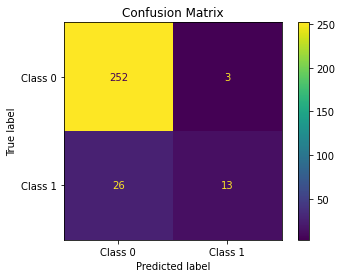

Training Accuracy (Best Model): 0.8707482993197279
Validation Accuracy (Best Model): 0.8728813559322034


In [5]:
# Train the best model on the combined training and validation sets
best_svm = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)
best_svm.fit(x_train_val, y_train_val)

# Make predictions on the test set
y_pred = best_svm.predict(x_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_svm, x_test, y_test, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


# Calculate the training and validation accuracies for the best model
best_training_acc = best_svm.score(x_train_val, y_train_val)
best_validation_acc = best_svm.score(x_val, y_val)

# Print the training and validation accuracies
print(f"Training Accuracy (Best Model): {best_training_acc}")
print(f"Validation Accuracy (Best Model): {best_validation_acc}")




In [6]:
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a list to store the results
results = []

# Iterate over all combinations of parameters
for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        for kernel in param_grid['kernel']:
            # Train the model
            svm = SVC(kernel=kernel, C=C, gamma=gamma)
            svm.fit(x_train, y_train)
            
            # Calculate metrics
            y_train_pred = svm.predict(x_train)
            y_val_pred = svm.predict(x_val)
            training_acc = svm.score(x_train, y_train)
            validation_acc = svm.score(x_val, y_val)
            f1 = f1_score(y_val, y_val_pred, average='weighted')
            precision = precision_score(y_val, y_val_pred, average='weighted')
            recall = recall_score(y_val, y_val_pred, average='weighted')
            
            # Append the results to the list
            results.append([C, gamma, kernel, training_acc, validation_acc, f1, precision, recall])

# Print the results in a table
headers = ["C", "Gamma", "Kernel", "Training Acc", "Validation Acc", "F1 Score", "Precision", "Recall"]
print(tabulate(results, headers=headers, tablefmt="grid"))


+-------+---------+----------+----------------+------------------+------------+-------------+----------+
|     C |   Gamma | Kernel   |   Training Acc |   Validation Acc |   F1 Score |   Precision |   Recall |
+=======+=========+==========+================+==================+============+=============+==========+
|   0.1 |   0.001 | linear   |       0.837234 |         0.809322 |   0.72403  |    0.655002 | 0.809322 |
+-------+---------+----------+----------------+------------------+------------+-------------+----------+
|   0.1 |   0.001 | poly     |       0.837234 |         0.809322 |   0.72403  |    0.655002 | 0.809322 |
+-------+---------+----------+----------------+------------------+------------+-------------+----------+
|   0.1 |   0.001 | rbf      |       0.837234 |         0.809322 |   0.72403  |    0.655002 | 0.809322 |
+-------+---------+----------+----------------+------------------+------------+-------------+----------+
|   0.1 |   0.001 | sigmoid  |       0.837234 |        